# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.148558e+01     7.962046e+00
 * time: 0.002588987350463867
     1     2.925615e+01     4.714858e+00
 * time: 0.011579036712646484
     2     1.981615e+01     3.523183e+00
 * time: 0.02239394187927246
     3     1.401105e+01     2.641118e+00
 * time: 0.03314495086669922
     4     1.372347e+01     3.956534e+00
 * time: 0.04182600975036621
     5     1.361753e+01     2.895662e+00
 * time: 0.050634145736694336
     6     1.163199e+01     3.503075e+00
 * time: 0.059307098388671875
     7     1.049218e+01     3.134150e+00
 * time: 0.06811714172363281
     8     9.397544e+00     1.689593e+00
 * time: 0.07672595977783203
     9     8.865049e+00     1.152786e+00
 * time: 0.0854029655456543
    10     8.555326e+00     1.032716e+00
 * time: 0.09402608871459961
    11     8.538113e+00     1.505113e+00
 * time: 0.10054993629455566
    12     8.528824e+00     9.895215e-01
 * time: 0.10721302032470703
    13     8.525419e+00     1.336639e+00
 * ti

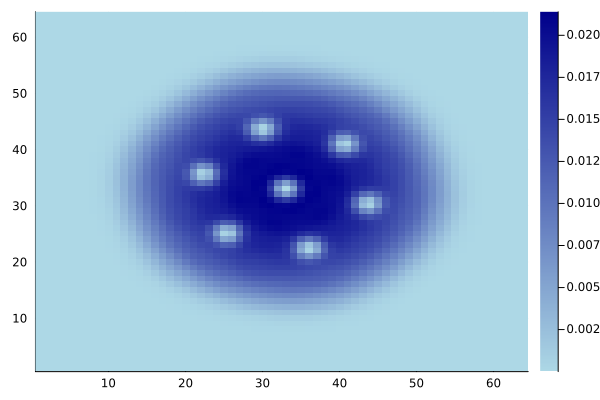

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)